# Поиск фото "Со смыслом"

Мы работаетем в фотохостинге для профессиональных фотографов «Со Смыслом» (“With Sense”).

Пользователи размещают свои фотографии на хостинге и сопровождают их полным описанием: указывают место съёмок, модель камеры и т.д. Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.
Наш отдел занимается экспериментом по разработке поиска референсных фотографий для фотографов. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Сервис выводит несколько фотографий с такой же или похожей сценой.

Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Нам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно выбрать лучшую модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу. На основе лучшей модели можно будет собрать предварительную версию продукта, которую вы покажете руководителю компании.
Юридические ограничения

В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет.

В нашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

This image is unavailable in your country in compliance with local laws.

Однако у нас в PoC нет возможности воспользоваться данным функционалом. Поэтому необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер.

**Юридические ограничения**

В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет.

В нашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

This image is unavailable in your country in compliance with local laws.

Однако у нас в PoC нет возможности воспользоваться данным функционалом. Поэтому необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер.

**Описание данных**

В файле train_dataset.csv собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.
В папке train_images содержатся изображения для тренировки модели.
В файле CrowdAnnotations.tsv — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:
1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.
В файле ExpertAnnotations.tsv содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:
1. Имя файла изображения.
2. Идентификатор описания.
3, 4, 5 — оценки трёх экспертов.
Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.
В файле test_queries.csv находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.
В папке test_images содержатся изображения для тестирования модели.


**Исследовательский анализ данных**

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:
1. Доля исполнителей, подтвердивших, что текст соответствует картинке.
2. Количество исполнителей, подтвердивших, что текст соответствует картинке.
3. Количество исполнителей, подтвердивших, что текст не соответствует картинке.
После анализа экспертных и краудсорсинговых оценок выберем либо одну из них, либо объединим их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.
Наша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


Загрузим датасет с сервера, распакуем и проверим содержание корневого каталога сессии.

In [ ]:
!wget -N https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
!unzip -uq dsplus_integrated_project_4.zip
print('-' * 100)
!ls

--2023-06-10 20:39:15--  https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
Resolving code.s3.yandex.net (code.s3.yandex.net)... 93.158.134.158, 2a02:6b8::2:158
Connecting to code.s3.yandex.net (code.s3.yandex.net)|93.158.134.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150987455 (144M) [application/zip]
Saving to: ‘dsplus_integrated_project_4.zip’

dsplus_integrated_p 100%[===================>] 143.99M  48.3MB/s    in 3.0s    

2023-06-10 20:39:19 (48.3 MB/s) - ‘dsplus_integrated_project_4.zip’ saved [150987455/150987455]

----------------------------------------------------------------------------------------------------
dsplus_integrated_project_4.zip  __MACOSX  sample_data	to_upload


**Осуществим импорт библиотек**

In [ ]:
!pip install -q transformers tokenization sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:00


Загрузим данные и провём исследовательский анализ данных
Скачаем  и откроем файлы с данными. Проверим данные и откорректируем их, если потребуется.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random
import transformers as ppb
import requests
from transformers import pipeline
from transformers import DistilBertModel
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

from pathlib import Path
import pickle
from PIL import Image


import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


import os
from tqdm import notebook

from sklearn.model_selection import GroupShuffleSplit, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

import sentence_transformers
from sentence_transformers import SentenceTransformer, util
import glob
from tqdm.notebook import tqdm
tqdm.pandas()
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device('cpu')


PATH = '/content/to_upload'
SEED = 12345
np.random.seed(SEED)
#tf.random.set_seed(SEED)

CUDA is available!  Training on GPU ...


Прочитаем данные из файлов.

In [ ]:
def read_df(path=PATH) -> pd.DataFrame:

    '''читаем датафреймы из указанной директории'''

    df_train = pd.read_csv(Path(path, 'train_dataset.csv'))
    df_crowd = pd.read_csv(Path(path, 'CrowdAnnotations.tsv'), sep='\t',
                           names=['image', 'query_id', 'share_pos', 'count_pos', 'count_neg'])
    df_expert = pd.read_csv(Path(path, 'ExpertAnnotations.tsv'), sep='\t',
                           names=['image', 'query_id', 'first', 'second', 'third'])
    df_queries = pd.read_csv(Path(path, 'test_queries.csv'), index_col=[0], sep='|')
    df_images = pd.read_csv(Path(path, 'test_images.csv'), sep='|')

    return df_train, df_crowd, df_expert, df_queries, df_images

df_train, df_crowd, df_expert, df_queries, df_images = read_df()

In [ ]:
display(df_train.head(), df_crowd.head(), df_expert.head(), df_queries.head(), df_images.head())

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

image                     query_id  share_pos  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2        1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2        0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2        0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2        0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2        0.0   

   count_pos  count_neg  
0          3          0  
1          0          3  
2          0          3  
3          0          3  
4          0          3

image                     query_id  first  second  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      1       1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2      1       1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2      1       1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2      1       2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2      1       1   

   third  
0      1  
1      2  
2      2  
3      2  
4      2

query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

image
0  3356748019_2251399314.jpg
1  2887171449_f54a2b9f39.jpg
2  3089107423_81a24eaf18.jpg
3  1429546659_44cb09cbe2.jpg
4  1177994172_10d143cb8d.jpg

Познакомимся с изображениями, входящими в датасеты.

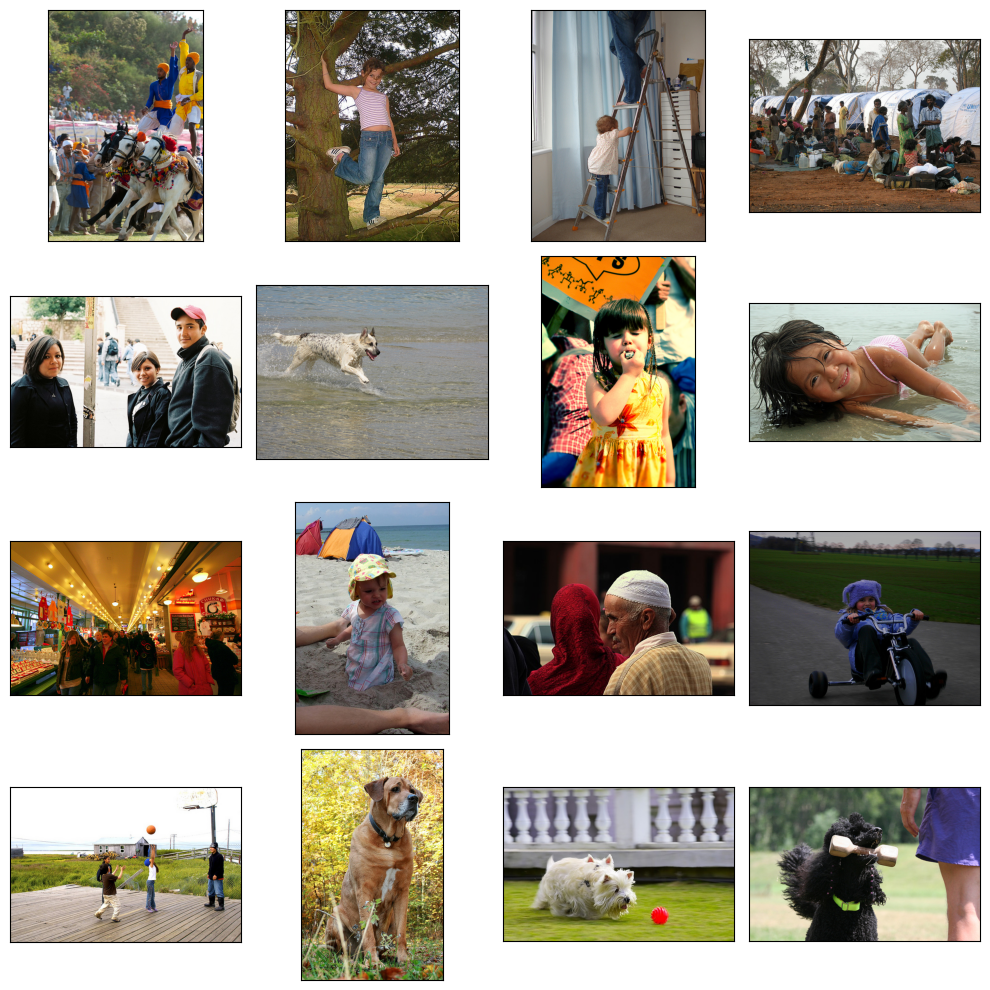

In [ ]:
samples_train = list(df_train['image'].sample(8))
samples_test = list(df_queries['image'].sample(8))

fig = plt.figure(figsize=(10,10))
for i in range(8):
    fig.add_subplot(4, 4, i+1)
    image = Image.open(Path(PATH, 'train_images', samples_train[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
for i in range(8):
    fig.add_subplot(4, 4, i+9)
    image = Image.open(Path(PATH, 'test_images', samples_test[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [ ]:
df_train.describe()

image                     query_id  \
count                        5822                         5822   
unique                       1000                          977   
top     3364151356_eecd07a23e.jpg  2600867924_cd502fc911.jpg#2   
freq                           10                           34   

                                               query_text  
count                                                5822  
unique                                                977  
top     Two dogs , one brown and white and one black a...  
freq                                                   34

Как видно из таблицы, в тренировочном датасете у нас 1000 изображений, имеющих 5822 связей с описаниями, 977 из которых уникальны.

In [ ]:
df_queries.describe()

query_id  \
count                           500   
unique                          500   
top     1177994172_10d143cb8d.jpg#0   
freq                              1   

                                               query_text  \
count                                                 500   
unique                                                500   
top     Two blonde boys , one in a camouflage shirt an...   
freq                                                    1   

                            image  
count                         500  
unique                        100  
top     1177994172_10d143cb8d.jpg  
freq                            5

В тестовой выборке 100 фото, которым соответсвует 500 уникальных описаний. Получается, что каждой фотографии соответствует в точности 5 уникальных описаний.


Посмотрим данные по соответствию изображения и описания, полученные с помощью краудсорсинга:

In [ ]:
print('Количество уникальных сочетаний фото-текст оцененных экспертами:', df_expert.drop_duplicates().shape[0])
print('Количество уникальных сочетаний фото-текст оцененных людьми:', df_crowd.drop_duplicates().shape[0])

Количество уникальных сочетаний фото-текст оцененных экспертами: 5822
Количество уникальных сочетаний фото-текст оцененных людьми: 47830


Проверим, все ли текстовые описания в тестовом наборе совпадают с картинками. В столбце query_id зашифрована информация о номере картинки к которой дано описание в столбце query_text.

In [ ]:
df_queries[df_queries['query_id'].str[:-2] != df_queries['image']].shape[0]

0

**Выводы**

Мы загрузили и ознакомились с данными.
Как видно из таблицы, в тренировочном датасете у нас 1000 изображений, имеющих 5822 связей с описаниями, 977 из которых уникальны.
В тестовой выборке 100 фото, которым соответсвует 500 уникальных описаний. Получается, что каждой фотографии соответствует в точности 5 уникальных описаний.
Количество уникальных сочетаний фото-текст оцененных экспертами: 5822
Количество уникальных сочетаний фото-текст оцененных людьми: 47830
Пересечений между наборами данных для трейна и теста не обнаружено.


Перейдём к аггрегации оценок для получения тестов.


### Предобработка и объединение данных

Проведём агрегацию оценок - голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая.


In [ ]:
def voting(v1, v2, v3):
    if v1 == v2 or v1 == v3:
        return v1
    elif v2 == v3:
        return v2
    else:
        return None

In [ ]:
df_expert['experts'] = df_expert.apply(
    lambda x: voting(x['first'], x['second'], x['third']), axis=1)

Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.


In [ ]:
df_expert = df_expert.dropna(subset=['experts'])

In [ ]:
df_expert.head()

image                     query_id  first  second  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      1       1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2      1       1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2      1       1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2      1       2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2      1       1   

   third  experts  
0      1      1.0  
1      2      1.0  
2      2      1.0  
3      2      2.0  
4      2      1.0

In [ ]:
df_expert.shape

(5696, 6)

In [ ]:
df_crowd.tail()

image                    query_id  share_pos  \
47825  997722733_0cb5439472.jpg  543007912_23fc735b99.jpg#2   0.000000   
47826  997722733_0cb5439472.jpg  544576742_283b65fa0d.jpg#2   0.333333   
47827  997722733_0cb5439472.jpg  872622575_ba1d3632cc.jpg#2   1.000000   
47828  997722733_0cb5439472.jpg  888425986_e4b6c12324.jpg#2   0.000000   
47829  997722733_0cb5439472.jpg  997722733_0cb5439472.jpg#2   0.666667   

       count_pos  count_neg  
47825          0          3  
47826          1          2  
47827          3          0  
47828          0          3  
47829          2          1

После анализа экспертных оценок выберем: если есть пропуск, то оставим оценку эксперта, либо оценку краудсорсинга


In [ ]:
df_scores = pd.merge(df_expert, df_crowd, how='outer', on=['image', 'query_id'])

def score_aggregate(row) -> object:

    if np.isnan(row['experts']):
        row['score'] = row['share_pos']
    elif np.isnan(row['share_pos']):
        row['score'] = row['experts']

    return row

df_scores = df_scores.apply(score_aggregate, axis=1)

Обьединим с тренровочным датасетом

In [ ]:
df_train = pd.merge(df_train, df_scores[['image', 'query_id', 'score']], how='outer', on=['image', 'query_id'])

Если в краудсорсинге оценка < 0.6, вернём 0, если больше 0.6, вернём 1

In [ ]:
def score(row) -> object:

    if row['score'] > 0.6:
        row['score'] = 1
    elif row['score'] < 0.6:
        row['score'] = 0

    return row
df_train = df_train.apply(score, axis=1)

Проверим

In [ ]:
df_train.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  score  
0  A young child is wearing blue goggles and sitt...    NaN  
1  A young child is wearing blue goggles and sitt...    1.0  
2  A young child is wearing blue goggles and sitt...    NaN  
3  A young child is wearing blue goggles and sitt...    NaN  
4  A young child is wearing blue goggles and sitt...    1.0

Заполним пропуски

In [ ]:
to_fill = df_train[df_train['query_text'].notna()]

In [ ]:
def fill_text(row) -> object:

    if pd.isnull(row['query_text']):
        texts = to_fill[to_fill['query_id'] == row['query_id']]['query_text']
        if len(texts) > 0:
            row['query_text'] = texts.iloc[0]

    return row

df_train = df_train.apply(fill_text, axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   query_text  50214 non-null  object 
 3   score       49010 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


Удалим пропуски

In [ ]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47901 entries, 1 to 51322
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       47901 non-null  object 
 1   query_id    47901 non-null  object 
 2   query_text  47901 non-null  object 
 3   score       47901 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
df_train.head()

image                     query_id  \
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
6  3155451946_c0862c70cb.jpg  2549968784_39bfbe44f9.jpg#2   
7  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   
8   343218198_1ca90e0734.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  score  
1  A young child is wearing blue goggles and sitt...    1.0  
4  A young child is wearing blue goggles and sitt...    1.0  
6  A young child is wearing blue goggles and sitt...    1.0  
7  A young child is wearing blue goggles and sitt...    1.0  
8  A young child is wearing blue goggles and sitt...    1.0

**ВЫВОД**


Проведёли агрегацию оценок - голосование большинства. Когда каждый эксперт поставил разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст  исключили из датасета. После анализа экспертных оценок выбрали: если есть пропуск, то оставим оценку эксперта, либо оценку краудсорсинга. Если в краудсорсинге оценка < 0.6, вернули 0, если больше 0.6, вернули 1. Обьединили датасеты, заполнили пропуски.

### Проверка данных



Лемматизируем описание фотографий

In [ ]:
# Объявим корпус текстов
corpus = list(df_train['query_text'])
print(corpus[0])

A young child is wearing blue goggles and sitting in a float in a pool .


In [ ]:
# Объявим лемматизатор и функцию для очистки и лемматизации текстов "clear_text
lemmatizer = WordNetLemmatizer()
def clear_text(text):
    y=re.sub(r"[^'a-zA-Z ]", ' ', text)
    k=" ".join(y.split())
    return k

In [ ]:
# создадим функцию которая будет использовать функцию по очистке слов и лемматизировать
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def lemmafunction(textc):
    k=[]
    for i in nltk.word_tokenize(textc):
        y=lemmatizer.lemmatize(i, get_wordnet_pos(i))
        k.append(y)
    return ' '.join(k)

In [ ]:
df_train['lemm_text'] = df_train['query_text'].progress_apply(clear_text)
df_train['lemm_text'] = df_train['lemm_text'].progress_apply(lemmafunction)

  0%|          | 0/47901 [00:00<?, ?it/s]

  0%|          | 0/47901 [00:00<?, ?it/s]

Проверка текст до

In [ ]:
df_train['query_text']

1        A young child is wearing blue goggles and sitt...
4        A young child is wearing blue goggles and sitt...
6        A young child is wearing blue goggles and sitt...
7        A young child is wearing blue goggles and sitt...
8        A young child is wearing blue goggles and sitt...
                               ...                        
51318                       Two girls with orange shirts .
51319                     A woman in jeans rock climbing .
51320           A man is climbing the side of a mountain .
51321                        A person flipping upside down
51322    A person in a red shirt climbing up a rock fac...
Name: query_text, Length: 47901, dtype: object

Текст после

In [ ]:
df_train['lemm_text']

1        A young child be wear blue goggles and sit in ...
4        A young child be wear blue goggles and sit in ...
6        A young child be wear blue goggles and sit in ...
7        A young child be wear blue goggles and sit in ...
8        A young child be wear blue goggles and sit in ...
                               ...                        
51318                           Two girl with orange shirt
51319                           A woman in jean rock climb
51320                A man be climb the side of a mountain
51321                            A person flip upside down
51322    A person in a red shirt climb up a rock face c...
Name: lemm_text, Length: 47901, dtype: object

Создадим список слов которые, могут попадать под юридические ограничения.


In [ ]:
stop_words = [
    "boy",
    "girl",
    "child",
    "baby",
    "teenager"]

Ищем слова из стоп-листа. Возвращаем True, если нашлось хотя бы одно слово

In [ ]:
def child_text(text: str) -> bool:
    res = False
    for i in stop_words:
        res |= text.lower().find(i) > -1
    return res

In [ ]:
df_train['child'] = df_train.apply(
    lambda x: child_text(x['lemm_text']), axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47901 entries, 1 to 51322
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       47901 non-null  object 
 1   query_id    47901 non-null  object 
 2   query_text  47901 non-null  object 
 3   score       47901 non-null  float64
 4   lemm_text   47901 non-null  object 
 5   child       47901 non-null  bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 2.2+ MB


Исключим из обучающего датасета пары, которые, исходя из подготовленного списка слов, могут попадать под юридические ограничения

In [ ]:
df_train.drop(df_train[df_train['child'] == True].index, inplace=True, errors='ignore')
df_train.drop(columns='child', inplace=True, errors='ignore')
df_train.reset_index(inplace=True, drop=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34684 entries, 0 to 34683
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       34684 non-null  object 
 1   query_id    34684 non-null  object 
 2   query_text  34684 non-null  object 
 3   score       34684 non-null  float64
 4   lemm_text   34684 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


**ВЫВОД**


Лемматизировали текст, исключили из обучающего датасета пары, которые, исходя из подготовленного списка слов, могут попадать под юридические ограничения

### Векторизация текста - BERT

In [ ]:
def make_embeddings(features):
    model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

  # Загрузка предобученной модели/токенизатора
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    model = model_class.from_pretrained(pretrained_weights).to(DEVICE)

    tokenized= features.apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))

    max_len = 0
    for i in tokenized.values:
        if len(i) > max_len:
            max_len = len(i)

    padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

    attention_mask = np.where(padded != 0, 1, 0)

    batch_size = 100

    embeddings = []
    for i in notebook.tqdm(range(padded.shape[0] // batch_size + 1)):
        N = (i+1) * batch_size
        if(i == padded.shape[0] // batch_size):
          N = padded.shape[0]
        batch = torch.LongTensor(padded[batch_size*i:N]).to(DEVICE)
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).to(DEVICE)

        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())
    final_features = np.concatenate(embeddings)
    final_features = pd.DataFrame(final_features)
    return final_features


In [ ]:
DEVICE

device(type='cuda')

In [ ]:
text_embeds = make_embeddings(df_train['lemm_text'])

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/347 [00:00<?, ?it/s]

In [ ]:
text_embeds.shape

(34684, 768)

### Векторизация изображений ResNet18

In [ ]:
def image_to_tensor(image_names, data):

    # Загрузим модель с предобученными параметрами
    resnet = models.resnet18(pretrained=True)
    # Заморозим веса
    for param in resnet.parameters():
        param.requires_grad_(False)

    resnet.fc = nn.Identity()
    resnet = resnet.to(DEVICE)



    # Переведем модель в режим предсказания
    resnet.eval();

    output_vectors = []
    images_names_list = image_names.values
    preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    if data == 'train':
        folder = 'train_images'
    elif data == 'test':
        folder = 'test_images'

    for img_name in images_names_list:
        img = Image.open(f"{PATH}/{folder}/{img_name}").convert('RGB')
        image_tensor = preprocess(img).unsqueeze(0)
        output_tensor =  resnet(image_tensor.to(DEVICE)).flatten()
        output_vectors.append(output_tensor.cpu().numpy())
        torch.cuda.empty_cache()
    return np.array(output_vectors)


In [ ]:
%%time
pict_embeds = image_to_tensor(image_names=df_train['image'], data='train')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 44.0MB/s]


CPU times: user 14min 51s, sys: 1min 8s, total: 15min 59s
Wall time: 8min 7s


In [ ]:
pict_embeds.shape

(34684, 512)

### Объединение векторов

На данном этапе решила не объединять вектора,а сделать по-другому. По описанию (текстовому) должен формироваться вектор описания (изображения).

- target - описание изображения
- features - описание текста+оценки экспертов

In [ ]:

features =np.concatenate((np.array(df_train['score']).reshape(-1,1), text_embeds), axis=1)
features.shape

(34684, 769)

In [ ]:
target = np.array(pict_embeds)
target.shape

(34684, 512)

### Обучение модели предсказания соответствия


Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом GroupShuffleSplit из библиотеки sklearn.model_selection.
Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=SEED)

train_indices, test_indices = next(gss.split(X=features, y=target, groups=df_train['image']))


X_train, y_train = features[train_indices], target[train_indices]

X_test, y_test = features[test_indices], target[test_indices]

In [ ]:
print('Размер тренировочной выборки:', X_train.shape)
print('Размер тестовой выборки:', X_test.shape)


Размер тренировочной выборки: (24305, 769)
Размер тестовой выборки: (10379, 769)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### LinearRegression

Выберем метрику RMSE. Она будет активнее реагировать на большие выбросы.
RMSE: метрика, которая сообщает нам квадратный корень из средней квадратичной разницы между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже RMSE, тем лучше модель соответствует набору данных.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
%%time
model_LR = LinearRegression()
cv_LR = cross_validate(model_LR,
                      X_train,
                      y_train,
                      scoring=('neg_root_mean_squared_error'),
                      return_train_score=True)

CPU times: user 32.6 s, sys: 11.9 s, total: 44.6 s
Wall time: 15.7 s


In [ ]:
fit_time_LR = cv_LR['fit_time'].mean()
score_time_LR = cv_LR['score_time'].mean()
test_score_LR= cv_LR['test_score'].mean()

In [ ]:
print('Время обучения: {},  время предсказания: {} и качество модели: {}'.format(fit_time_LR, score_time_LR, test_score_LR))

Время обучения: 2.7487912654876707,  время предсказания: 0.1049471378326416 и качество модели: -0.7809128835401762


### Построение полносвязной нейронной сети

In [ ]:
X_train = torch.FloatTensor(np.array(X_train))
X_test = torch.FloatTensor(np.array(X_test))
y_train = torch.FloatTensor(np.array(y_train))
y_test = torch.FloatTensor(np.array(y_test))


In [ ]:
X_train.shape

torch.Size([24305, 769])

In [ ]:
print('Кол-во строк и столбцов в X_train выборке:', X_train.shape)
print('Кол-во строк и столбцов в X_test выборке:', X_test.shape)
print('Кол-во строк и столбцов в y_train выборке:', y_train.shape)
print('Кол-во строк и столбцов в y_test выборке:', y_test.shape)

Кол-во строк и столбцов в X_train выборке: torch.Size([24305, 769])
Кол-во строк и столбцов в X_test выборке: torch.Size([10379, 769])
Кол-во строк и столбцов в y_train выборке: torch.Size([24305, 512])
Кол-во строк и столбцов в y_test выборке: torch.Size([10379, 512])


In [ ]:
torch.use_deterministic_algorithms(True)

Настраиваем количество нейронов на слоях сети

In [ ]:
from math import ceil, sqrt

In [ ]:
n_in_neurons = 769
n_hidden_neurons_1 = 1500
n_hidden_neurons_2 = 1000
n_out_neurons = 512

In [ ]:
class Model(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)

        return x

In [ ]:
net = Model(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons) #модель
loss=nn.MSELoss()

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
optimizer1 = torch.optim.RMSprop(net.parameters(), lr=1e-3)
optimizer2 = torch.optim.Adam(net.parameters(), lr=1e-2)
optimizer3 = torch.optim.Adamax(net.parameters(), lr=1e-2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def cross_vall_score(path,idx,model, X_train, y_train, optim, num_epochs=10, batch_size=6, k=4, loss=nn.MSELoss()):
    '''Функция для кросс-валидации нейронной сети'''
    num_batches = ceil(len(X_train)/batch_size) # количество батчей
    num_val_samples = len(X_train)//k # размер валидационной выборки
    all_scores = []

    for i in range(k):
        #разбиваем на валидационную и тренировочную выборку
        print('processing fold #', i+1, end='  ')

        #обнуляем веса нейронной сети
        for layer in model.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()
        model = model.to(DEVICE)

        #валидационная выборка
        val_data = X_train[i*num_val_samples: (i+1)*num_val_samples]
        val_targets = y_train[i*num_val_samples: (i+1)*num_val_samples]

        #тренировочная выборка
        partial_train_data = np.concatenate([X_train[:i*num_val_samples], X_train[(i+1)*num_val_samples:]], axis = 0)
        partial_train_targets = np.concatenate([y_train[:i*num_val_samples], y_train[(i+1)*num_val_samples:]], axis = 0)

        #приводим наши данные к формату FloatTensor
        val_data = torch.FloatTensor(val_data).to(DEVICE)
        val_targets = torch.FloatTensor(val_targets).to(DEVICE)
        partial_train_data = torch.FloatTensor(partial_train_data)
        partial_train_targets = torch.FloatTensor(partial_train_targets)

        for epoch in range(num_epochs):
            #создаем случайную перестановку индексов для каждой эпохи
            order = np.random.permutation(len(partial_train_data))
            for batch_idx in range(num_batches):
                start_index = batch_idx * batch_size #стартовый индекс батча
                optim.zero_grad() #обнуляем градиаенты

                #извлекаем батч
                batch_indexes = order[start_index:start_index+batch_size]
                X_batch = partial_train_data[batch_indexes].to(DEVICE)
                y_batch = partial_train_targets[batch_indexes].to(DEVICE)

                preds = net.forward(X_batch).flatten() #получаем предсказание
                loss_value = loss(preds, y_batch.flatten()) #высчитываем ошибку
                loss_value.backward()
                optim.step()
                torch.cuda.empty_cache()

            if epoch == num_epochs-1:
                model.eval()
                val_preds = model.forward(val_data)
                RMSE_loss = torch.sqrt(loss(val_targets, val_preds))
                all_scores.append(RMSE_loss)
                print('RMSE метрика =', float(RMSE_loss))
        torch.save(model.state_dict(),path+'model_'+str(idx)+'_'+str(k)+'.pth')
    print('Средняя RMSE метрика =', int(sum(all_scores)/len(all_scores)),  '\n')
    return

In [ ]:
x = [optimizer, optimizer1, optimizer2, optimizer3]
torch.use_deterministic_algorithms(False)
for i in range(len(x)):
    print(i)
    cross_vall_score('/content/drive/MyDrive/',i,net, X_train, y_train,x[i] ,2)

0
processing fold # 1  RMSE метрика = 0.8105406761169434
processing fold # 2  RMSE метрика = 0.8247255086898804
processing fold # 3  RMSE метрика = 0.8166729211807251
processing fold # 4  RMSE метрика = 0.8204852938652039
Средняя RMSE метрика = 0 

1
processing fold # 1  RMSE метрика = 0.8120880126953125
processing fold # 2  RMSE метрика = 0.8240579962730408
processing fold # 3  RMSE метрика = 0.8175138831138611
processing fold # 4  RMSE метрика = 0.8145513534545898
Средняя RMSE метрика = 0 

2
processing fold # 1  RMSE метрика = 0.8129097819328308
processing fold # 2  RMSE метрика = 0.8282315135002136
processing fold # 3  RMSE метрика = 0.8214234113693237
processing fold # 4  RMSE метрика = 0.8247182369232178
Средняя RMSE метрика = 0 

3
processing fold # 1  RMSE метрика = 0.8333249092102051
processing fold # 2  RMSE метрика = 0.8192241787910461
processing fold # 3  RMSE метрика = 0.8112210035324097
processing fold # 4  RMSE метрика = 0.8113946318626404
Средняя RMSE метрика = 0 



Как мы видим результат метрики RMSE практически одинаковый, при линейной регресии RMSE 0.78, при обучении на нейронной сети 0.80. Дальнейшее тестирование проведём на нейронной сети,  так как наших мощностей хватило обучится на 10 эпохах. Считаю, что при углублении нейронная сеть даст лучший результат чем линейная регрессия.

### Тестирование модели и демонстрация работы

Настало время протестировать модель

In [ ]:
# Переводим тестовые изображения в вектора
test_images_vectors = image_to_tensor(image_names=df_images['image'], data='test')
test_images_vectors = scaler.fit_transform(test_images_vectors)
test_images_vectors.shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(100, 512)

In [ ]:
# Получаем 10 случайных описаний
df_test = df_queries['query_text'].sample(10, random_state=0)

In [ ]:
df_test.head()

90                              A boy plays basketball .
254    There are several people watching a person in ...
283    A brown and white dog walks in the snow with a...
445      A man and two boys standing in spraying water .
461    a small shaggy dog plays with a red ball on th...
Name: query_text, dtype: object

In [ ]:
# Функция, которая показывает дисклеймер, если описание попадает под ограничения

def is_disclaimer(string, stop_words):
    stop_words = stop_words
    lst = string.split(' ')
    s = []
    if len(set(lst).intersection(set(stop_words))) != 0:

        s.append('You asked for: '+ string)
        s.append('This image is unavailable in your country in compliance with local laws.')
    return s

In [ ]:
df_test = df_test.progress_apply(clear_text)
df_test = df_test.progress_apply(lemmafunction)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
test_im_torch = torch.FloatTensor(np.array([test_images_vectors]))

In [ ]:
#Функция, которая выводит наиболее релевантные изображения по текстовому запросу
def get_related_idx(text):
    net = Model(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons)
    net.load_state_dict(torch.load('/content/drive/MyDrive/model_0_4.pth'))
    net.eval()

    min_idxs = []
    dists = []


 # Переводим текст в вектор.

    text_img = net(torch.FloatTensor(np.array(text)))
    for t in text_img:
      d = torch.norm(torch.FloatTensor(np.array(test_images_vectors)) - t.unsqueeze(0), dim=1)
      dists.append(d.min().item())
      min_idxs.append(d.argmin().item())
    return min_idxs,dists

In [ ]:
df_test

90                                 A boy play basketball
254    There be several people watch a person in the ...
283    A brown and white dog walk in the snow with a ...
445               A man and two boy stand in spray water
461    a small shaggy dog play with a red ball on the...
15                 A brown dog be sit in some long grass
316           A group of people perform together onstage
489    I child slide into a wad pool full of water wh...
159                 People use an outdoor ice skate rink
153    The lady in the multi color shirt have a neckl...
Name: query_text, dtype: object

In [ ]:
test_embeddings = make_embeddings(df_test)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
test_features = np.concatenate((np.array([0 for i in range(10)]).reshape(-1,1), test_embeddings), axis=1)


In [ ]:
test_features = scaler.fit_transform(test_features)

In [ ]:
idxs,dists = get_related_idx(test_features)

In [ ]:
idxs

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18]

In [ ]:
dists

[25.292543411254883,
 25.528200149536133,
 28.065093994140625,
 24.306041717529297,
 27.48953628540039,
 27.67459487915039,
 24.763460159301758,
 23.085203170776367,
 24.025720596313477,
 23.410140991210938]

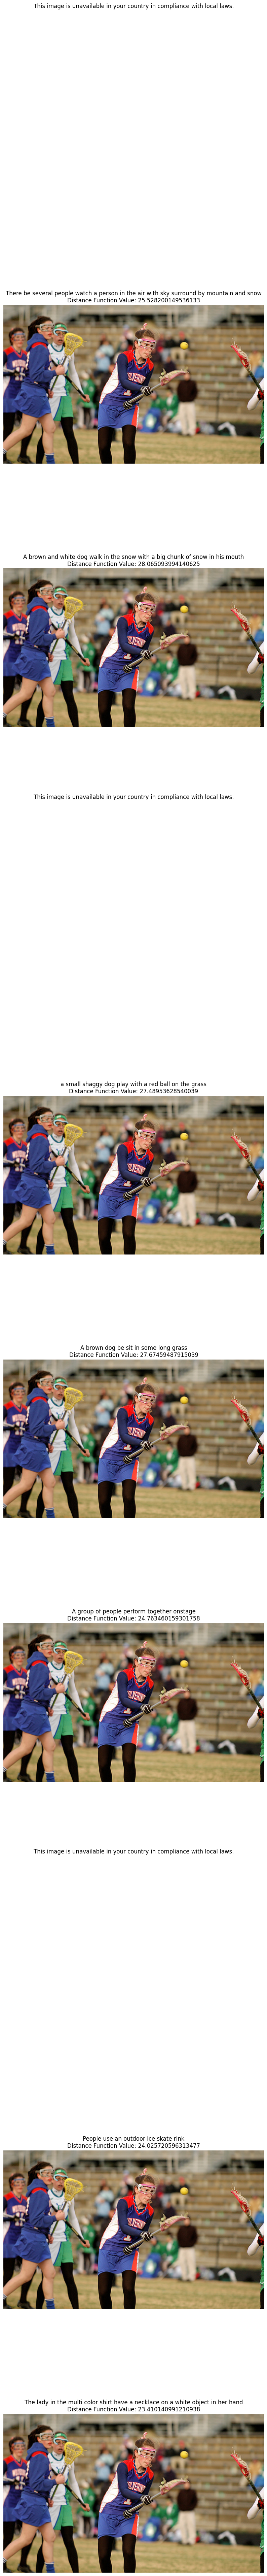

In [ ]:
rows = len(idxs)
cols = 1
fig = plt.figure(figsize=(10, 100))
plt.rcParams["figure.autolayout"] = True
for i in range(len(idxs)):
  fig.add_subplot(rows, cols, i+1)
  image = Image.open(Path(PATH, 'test_images', df_images['image'][int(idxs[i])]))
  s = is_disclaimer(df_test.values[i],stop_words)
  plt.axis('off')
  if (len(s) > 0):
    for j in range(len(s)):
      plt.title(s[j])
  else:
    plt.title(df_test.values[i] + '\n'+'Distance Function Value: '+ str(dists[i]))
    plt.imshow(image)
plt.show()




**Вывод**:

Задача состояла в следующем: пользователь сервиса вводит описание нужной сцены. Сервис выводит несколько фотографий с такой же или похожей сценой.
Нам поручено разработать демонстрационную версию поиска изображений по запросу. Загрузили датасет, осуществили импорт библиотек.В тренировочном датасете у нас 1000 изображений, имеющих 5822 связей с описаниями, 977 из которых уникальны.

В тестовой выборке 100 фото, которым соответсвует 500 уникальных описаний. Получается, что каждой фотографии соответствует в точности 5 уникальных описаний.
Пересечений между наборами данных для трейна и теста не обнаружено.

Проведёли агрегацию оценок - голосование большинства. Когда каждый эксперт поставил разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст  исключили из датасета. После анализа экспертных оценок выбрали: если есть пропуск, то оставим оценку эксперта, либо оценку краудсорсинга. Если в краудсорсинге оценка < 0.6, вернули 0, если больше 0.6, вернули 1. Обьединили датасеты, заполнили пропуски.

Лемматизировали текст, исключили из обучающего датасета пары, которые, исходя из подготовленного списка слов, могут попадать под юридические ограничения
Векторизировали текст и изображения.
Решили не объединять вектора. По описанию (текстовому) должен формироваться вектор описания (изображения).

- target - описание изображения
- features - описание текста+оценки экспертов

Для обучения разделите датасет на тренировочную и тестовую выборки.

Выбрали метрику RMSE. Она будет активнее реагировать на большие выбросы.

Обучили модель на линейной регрессии и на нейронной сети. Качество модели практическое одинаковое.

С помощью написанной  функции протестировали работу модели на нескольких текстовых описаниях: проверили, какие картинки она выдает при различных текстовых запросах.

Модель работает достаточно достоверно.

